In [61]:
import numpy as np
import os
from tqdm import tqdm
import sklearn
from PIL import Image
import json
import matplotlib.pyplot as plt

In [62]:
DATE = "20230331"
read_path = test_folderP = "C:/Users/sli248/ZReconstruction/DL/dataset/test/input/"
label_path = "C:/Users/sli248/ZReconstruction/DL/dataset/test/label/"
pred_path = "C:/Users/sli248/ZReconstruction/DL/Unet-Segmentation-Pytorch-Nest-of-Unets/model/gen_images"

In [63]:
from skimage.metrics import structural_similarity as ssim
from skimage.metrics import mean_squared_error

def cal_PSNR(image, image_hat):
    log_ = np.log10(np.max(image)**2/(np.mean(image-image_hat)**2))
    return 10*log_

def cal_RMSE(image, image_hat):

    return np.sqrt(np.sum((image - image_hat)**2)/(image.shape[0]*image.shape[1]))

def dict2arr(input_dict):
    All_list = []
    for key, value in input_dict.items():
        All_list.append(value)
    return np.array(All_list)


def cal_all(read_path, label_path):
    Metric_dict = dict()
    hist_metric = []
    #i = 0
    for file in tqdm(os.listdir(label_path),position=0,leave=True):
        name,suffix = os.path.splitext(file)
        if suffix == ".png":
            y_hat = np.asarray(Image.open(os.path.join(read_path,file)).convert('RGB'))
            y = np.asarray(Image.open(os.path.join(label_path, file)))
            #print("y_hat.shape ",y_hat.shape, "  y.shape=",y.shape)
            y_hat = (y_hat - y_hat.min())/ (y_hat.max()- y_hat.min())
            y  = (y - y.min())/(y.max() - y.min())


            #snr_ = cal_PSNR(y,y_hat)
            rmse_ = cal_RMSE(y,y_hat)
            psnr_ = cal_PSNR(y,y_hat)

            ssim_ = ssim(y, y_hat, data_range=y.max() - y.min(),multichannel=True)

            Metric_dict[name] = [psnr_,rmse_,ssim_]
            hist_metric.append([psnr_,rmse_,ssim_])
            # if i == 2:
            #     break
            # i += 1

    return Metric_dict,hist_metric

In [64]:

# Test it on the gt outpu
M_dict,hist_metric = cal_all(read_path, label_path)
M_arr = dict2arr(M_dict)

with open(os.path.join(os.path.dirname(pred_path),"test_input_output.txt"), 'w') as convert_file:
    convert_file.write(json.dumps(M_dict))

print("\ntest on the input")
print("the mean of psnr and rmse and ssim:")
print(M_arr.mean(axis=0))


# Test it on the pred
print("\ntest on the pred")
pre_dict,pred_hist_metric = cal_all(pred_path, label_path)
pre_arr = dict2arr(pre_dict)

with open(os.path.join(os.path.dirname(pred_path),"test_pred_output.txt"), 'w') as convert_file:
    convert_file.write(json.dumps(pre_dict))

print("the mean of psnr and rmse and ssim:")
print(pre_arr.mean(axis=0))
# M_dict = cal_all(read_path, label_path)
# M_arr = dict2arr(M_dict)
#
# print("the mean of snr and rmse:")
# print(M_arr.mean(axis=0))

100%|██████████| 400/400 [01:00<00:00,  6.65it/s]



test on the input
the mean of psnr and rmse and ssim:
[25.08679937  0.3279716   0.27134197]

test on the pred


100%|██████████| 400/400 [01:05<00:00,  6.07it/s]

the mean of psnr and rmse and ssim:
[29.04156917  0.18588231  0.60658895]


save to  C:/Users/sli248/ZReconstruction/DL/Unet-Segmentation-Pytorch-Nest-of-Unets/model\SNR_distribution.png


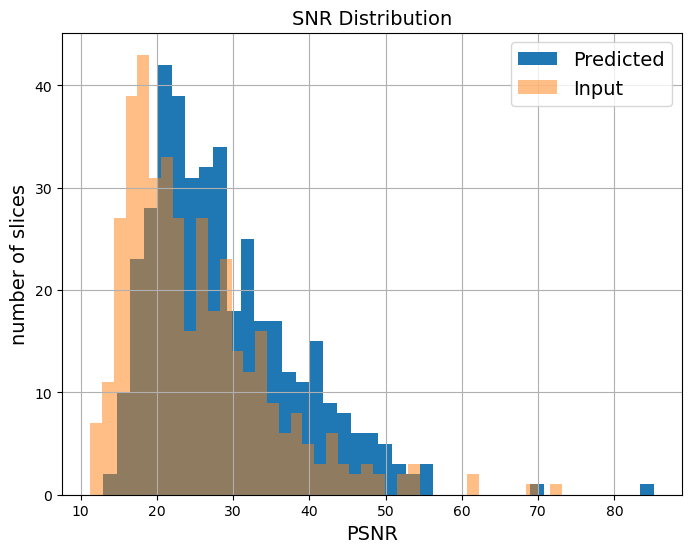

In [65]:
bins = 40
font_ = 14
predsnr_ = pre_arr[:,0]
originalsnr_ = M_arr[:, 0]
plt.figure(figsize=(8,6))
plt.hist(predsnr_, bins= bins, label="Predicted")
plt.hist(originalsnr_, bins=bins, alpha=0.5, label = "Input")
plt.xlabel("PSNR",fontsize=font_)
plt.ylabel("number of slices",fontsize=font_)
plt.title("SNR Distribution",fontsize=font_)
plt.legend(fontsize=font_)
plt.grid()
plt.savefig(os.path.join(os.path.dirname(pred_path),"SNR_distribution.png"),dpi=400,bbox_inches='tight')
print("save to ",os.path.join(os.path.dirname(pred_path),"SNR_distribution.png"))
plt.show()

save to  C:/Users/sli248/ZReconstruction/DL/Unet-Segmentation-Pytorch-Nest-of-Unets/model\RMSE_distribution.png


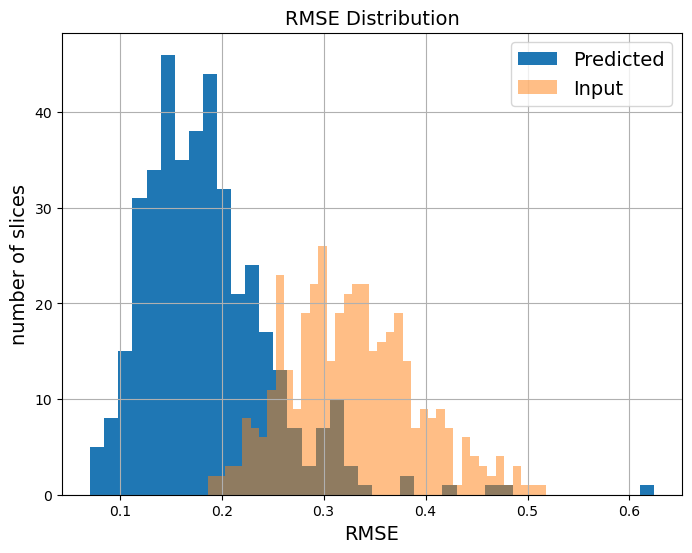

In [66]:
bins = 40
font_ = 14
predsnr_ = pre_arr[:,1]
originalsnr_ = M_arr[:, 1]
plt.figure(figsize=(8,6))
plt.hist(predsnr_, bins= bins, label="Predicted")
plt.hist(originalsnr_, bins=bins, alpha=0.5, label = "Input")
plt.xlabel("RMSE",fontsize=font_)
plt.ylabel("number of slices",fontsize=font_)
plt.title("RMSE Distribution",fontsize=font_)
plt.legend(fontsize=font_)
plt.grid()
plt.savefig(os.path.join(os.path.dirname(pred_path),"RMSE_distribution.png"),dpi=400,bbox_inches='tight')
print("save to ",os.path.join(os.path.dirname(pred_path),"RMSE_distribution.png"))
plt.show()